<a href="https://colab.research.google.com/github/Akeab-tame/GMF-Investment-Strategies/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
import pandas as pd
data = pd.read_csv('TSLA.csv')
data1 = pd.read_csv('BND.csv')
data2 = pd.read_csv('SPY.csv')

In [6]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


## Load the preprocessed data

In [19]:
data = pd.read_csv('cleaned_Tsla.csv')
data1 = pd.read_csv('cleaned_bnd.csv')
data2 = pd.read_csv('cleaned_spy.csv')

In [22]:
data.fillna(0, inplace=True)
data1.fillna(0, inplace=True)
data2.fillna(0, inplace=True)

In [23]:
data

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume,Daily Change TSLA,Rolling Mean TSLA,Rolling Std TSLA
0,0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,0.000000,0.000000,0.000000
1,1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-4.204103,0.000000,0.000000
2,2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,0.566424,0.000000,0.000000
3,3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,-0.156193,0.000000,0.000000
4,4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,-0.156431,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2469,2469,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900,21.919035,235.771001,17.072037
2470,2470,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900,3.343823,236.207502,17.831237
2471,2471,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600,-2.481516,236.251502,17.898231
2472,2472,2024-10-29 00:00:00+00:00,259.519989,259.519989,264.980011,255.509995,264.510010,80521800,-1.139012,236.326502,17.997119


In [24]:
from pmdarima import auto_arima

In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index('Date', inplace=True)
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

In [45]:
# Split the data into train and test sets
train = data.iloc[:int(0.8 * len(data))]
test = data.iloc[int(0.8 * len(data)):]

# Split the data1 into train and test sets
train1 = data1.iloc[:int(0.8 * len(data1))]
test1 = data1.iloc[int(0.8 * len(data1)):]

# Split the data2 into train and test sets
train2 = data2.iloc[:int(0.8 * len(data2))]
test2 = data2.iloc[int(0.8 * len(data2)):]

In [55]:
print('TSLA Performing:')
arima_order = auto_arima(train['Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = arima_order.order
arima_model = ARIMA(train['Close'], order=(p, d, q)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

print('BND Performing:')
arima_order1 = auto_arima(train1['Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = arima_order1.order
arima_model1 = ARIMA(train1['Close'], order=(p, d, q)).fit()
arima_forecast1 = arima_model1.forecast(steps=len(test1))

print('SPY Performing:')
arima_order2 = auto_arima(train2['Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = arima_order2.order
arima_model2 = ARIMA(train2['Close'], order=(p, d, q)).fit()
arima_forecast2 = arima_model2.forecast(steps=len(test2))

TSLA Performing:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.071 seconds
BND Performing:
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1712.480, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1266.320, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1710.480, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1020.669, Time=0.50 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=801.511, Time=0.74 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=647.040, Time=0.93 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=588.876, Time=1.08 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=320.650, Time=8.65 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.04 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.01 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.69 sec

Best model:  ARIMA(5,2,1)(0,0,0)[0] intercept
Total fit time: 45.690 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SPY Performing:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10608.385, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10698.996, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10682.964, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10684.626, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10698.098, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10682.109, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10682.453, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10609.234, Time=4.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10683.976, Time=4.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10681.772, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10682.396, Time=1.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10683.319, Time=2.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10607.671, Time=1.40 sec
 ARIMA(1,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
print('Calculate ARIMA metrics for TSLA:')
arima_rmse = sqrt(mean_squared_error(test['Close'], arima_forecast))
arima_mae = mean_absolute_error(test['Close'], arima_forecast)
arima_mape = mean_absolute_percentage_error(test['Close'], arima_forecast)
print("ARIMA RMSE:", arima_rmse, "| MAPE:", arima_mape , "| MAE:", arima_mae)

print('Calculate ARIMA metrics for BND:')
arima_rmse1 = sqrt(mean_squared_error(test1['Close'], arima_forecast1))
arima_mae1 = mean_absolute_error(test1['Close'], arima_forecast1)
arima_mape1 = mean_absolute_percentage_error(test1['Close'], arima_forecast1)
print("ARIMA RMSE:", arima_rmse1, "| MAPE:", arima_mape1 , "| MAE:", arima_mae1)

print('Calculate ARIMA metrics for SPY:')
arima_rmse2 = sqrt(mean_squared_error(test2['Close'], arima_forecast2))
arima_mae2 = mean_absolute_error(test2['Close'], arima_forecast2)
arima_mape2 = mean_absolute_percentage_error(test2['Close'], arima_forecast2)
print("ARIMA RMSE:", arima_rmse2, "| MAPE:", arima_mape2 , "| MAE:", arima_mae2)

Calculate ARIMA metrics for TSLA:
ARIMA RMSE: 49.1129918969654 | MAPE: 0.17612209105913845 | MAE: 38.907052519827175
Calculate ARIMA metrics for BND:
ARIMA RMSE: 15.387247017016076 | MAPE: 0.18990265298823258 | MAE: 13.794437444082337
Calculate ARIMA metrics for SPY:
ARIMA RMSE: 110.98611716894132 | MAPE: 0.18702696509371264 | MAE: 93.64156201877988


In [59]:
# --- SARIMA Model ---
# Determine seasonal parameters using auto_arima with seasonality
print('Seasonal Parameters for TSLA:')
sarima_order = auto_arima(train['Close'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = sarima_order.order
P, D, Q, s = sarima_order.seasonal_order

sarima_model = SARIMAX(train['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_forecast = sarima_model.forecast(steps=len(test))

print('Seasonal Parameters for BND:')
sarima_order1 = auto_arima(train1['Close'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = sarima_order1.order
P, D, Q, s = sarima_order1.seasonal_order

sarima_model1 = SARIMAX(train1['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_forecast1 = sarima_model1.forecast(steps=len(test1))


print('Seasonal Parameters for SPY:')
sarima_order2 = auto_arima(train2['Close'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
p, d, q = sarima_order2.order
P, D, Q, s = sarima_order2.seasonal_order

sarima_model2 = SARIMAX(train2['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
sarima_forecast2 = sarima_model2.forecast(steps=len(test2))

Seasonal Parameters for TSLA:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12337.622, Time=5.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12340.889, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12340.375, Time=0.99 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12340.797, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12339.337, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=12345.594, Time=6.18 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=12345.207, Time=4.37 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=12315.154, Time=17.43 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=12313.154, Time=14.12 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=12311.156, Time=10.51 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=12343.201, Time=3.07 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=12313.155, Time=15.83 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=12335.607, Time=8.39 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Seasonal Parameters for BND:
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=10.42 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1710.480, Time=0.10 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1249.161, Time=0.47 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1264.320, Time=0.13 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=1247.880, Time=1.08 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=1249.830, Time=4.02 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1247.755, Time=2.55 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1250.574, Time=0.50 sec
 ARIMA(1,2,0)(1,0,2)[12]             : AIC=1249.882, Time=4.49 sec
 ARIMA(1,2,0)(0,0,2)[12]             : AIC=1247.896, Time=1.28 sec
 ARIMA(1,2,0)(2,0,2)[12]             : AIC=1251.706, Time=3.63 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1694.901, Time=2.98 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=1005.782, Time=1.74 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Seasonal Parameters for SPY:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=10611.239, Time=11.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10698.996, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10684.668, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10686.329, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10698.098, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=10609.432, Time=9.81 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=10608.385, Time=3.05 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=10609.385, Time=10.93 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=10682.109, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=10682.453, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=10609.234, Time=2.92 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=10683.976, Time=3.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=10681.772, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
# Calculate SARIMA metrics
print('Calculate SARIMA metrics for TSLA')
sarima_rmse = sqrt(mean_squared_error(test['Close'], sarima_forecast))
sarima_mae = mean_absolute_error(test['Close'], sarima_forecast)
sarima_mape = mean_absolute_percentage_error(test['Close'], sarima_forecast)
print("SARIMA RMSE:", sarima_rmse, "| MAPE:", sarima_mape, "| MAE:", sarima_mae)

print('Calculate SARIMA metrics for BND')
sarima_rmse1 = sqrt(mean_squared_error(test1['Close'], sarima_forecast1))
sarima_mae1 = mean_absolute_error(test1['Close'], sarima_forecast1)
sarima_mape1 = mean_absolute_percentage_error(test1['Close'], sarima_forecast1)
print("SARIMA RMSE:", sarima_rmse1, "| MAPE:", sarima_mape1, "| MAE:", sarima_mae1)

print('Calculate SARIMA metrics for SPY')
sarima_rmse2 = sqrt(mean_squared_error(test2['Close'], sarima_forecast2))
sarima_mae2 = mean_absolute_error(test2['Close'], sarima_forecast2)
sarima_mape2 = mean_absolute_percentage_error(test2['Close'], sarima_forecast2)
print("SARIMA RMSE:", sarima_rmse2, "| MAPE:", sarima_mape2, "| MAE:", sarima_mae2)

Calculate SARIMA metrics for TSLA
SARIMA RMSE: 55.68690552633029 | MAPE: 0.20261358116663047 | MAE: 45.28501024754087
Calculate SARIMA metrics for BND
SARIMA RMSE: 2.7246452138825443 | MAPE: 0.03345164386570625 | MAE: 2.4447238793830954
Calculate SARIMA metrics for SPY
SARIMA RMSE: 110.98611716894132 | MAPE: 0.18702696509371264 | MAE: 93.64156201877988


The result for the SARIMA metrics and ARIMA metrics is the same result.

# --- LSTM Model ---
##### Prepare data for LSTM (reshaping and scaling)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train[['Close']])
scaled_test = scaler.transform(test[['Close']])

scaled_train1 = scaler.fit_transform(train1[['Close']])
scaled_test1 = scaler.transform(test1[['Close']])

scaled_train2 = scaler.fit_transform(train2[['Close']])
scaled_test2 = scaler.transform(test2[['Close']])

In [76]:
# Convert to sequences for TSLA
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 10
x_train, y_train = create_sequences(scaled_train, seq_length)
x_test, y_test = create_sequences(scaled_test, seq_length)

In [77]:
# Convert to sequences for BND
def create_sequences(data1, seq_length):
    x, y = [], []
    for i in range(len(data1) - seq_length):
        x.append(data1[i:i + seq_length])
        y.append(data1[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 10
x_train1, y_train1 = create_sequences(scaled_train1, seq_length)
x_test1, y_test1 = create_sequences(scaled_test1, seq_length)

In [78]:
# Convert to sequences for SPY
def create_sequences(data2, seq_length):
    x, y = [], []
    for i in range(len(data2) - seq_length):
        x.append(data2[i:i + seq_length])
        y.append(data2[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 10
x_train2, y_train2 = create_sequences(scaled_train2, seq_length)
x_test2, y_test2 = create_sequences(scaled_test2, seq_length)

In [79]:
# Build the LSTM model for TSLA
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0036
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 9.2170e-04
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 7.6837e-04
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 6.0872e-04
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 5.2624e-04
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 3.6693e-04
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 4.5603e-04
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 4.9319e-04
Epoch 9/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 6.7579e-04
Epoch 10/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 3.4322e-04


In [80]:
# Build the LSTM model for BND
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train1, y_train1, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 2.9353e-04
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 3.6934e-04
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 2.2867e-04
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 2.7750e-04
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 2.5851e-04
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 3.5820e-04
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 3.5509e-04
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 2.9327e-04
Epoch 9/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 2.5020e-04
Epoch 10/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 3.1571e-04


In [81]:
# Build the LSTM model for SPY
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train2, y_train2, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 2.7905e-04
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 2.4356e-04
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 2.3649e-04
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 2.6625e-04
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 2.4806e-04
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.5189e-04
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 2.6309e-04
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 2.9974e-04
Epoch 9/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 2.5415e-04
Epoch 10/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 2.4603e-04


In [83]:
# Forecast with LSTM for TSLA
print('Forecast with LSTM for TSLA')
lstm_forecast = lstm_model.predict(x_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)  # Inverse scaling

# Forecast with LSTM for BND
print('Forecast with LSTM for BND')
lstm_forecast1 = lstm_model.predict(x_test1)
lstm_forecast1 = scaler.inverse_transform(lstm_forecast1)  # Inverse scaling

# Forecast with LSTM for SPY
print('Forecast with LSTM for SPY')
lstm_forecast2 = lstm_model.predict(x_test2)
lstm_forecast2 = scaler.inverse_transform(lstm_forecast2)  # Inverse scaling

Forecast with LSTM for TSLA
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Forecast with LSTM for BND
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Forecast with LSTM for SPY
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [84]:
# Calculate LSTM metrics
print('Calculate LSTM metrics for TSLA')
lstm_rmse = sqrt(mean_squared_error(test['Close'][seq_length:], lstm_forecast))
lstm_mae = mean_absolute_error(test['Close'][seq_length:], lstm_forecast)
lstm_mape = mean_absolute_percentage_error(test['Close'][seq_length:], lstm_forecast)
print("LSTM RMSE:", lstm_rmse, "| MAPE:", lstm_mape, "| MAE:", lstm_mae)

print('Calculate LSTM metrics for BND')
lstm_rmse1 = sqrt(mean_squared_error(test1['Close'][seq_length:], lstm_forecast1))
lstm_mae1 = mean_absolute_error(test1['Close'][seq_length:], lstm_forecast1)
lstm_mape1 = mean_absolute_percentage_error(test1['Close'][seq_length:], lstm_forecast1)
print("LSTM RMSE:", lstm_rmse1, "| MAPE:", lstm_mape1, "| MAE:", lstm_mae1)

print('Calculate LSTM metrics for SPY')
lstm_rmse2 = sqrt(mean_squared_error(test2['Close'][seq_length:], lstm_forecast2))
lstm_mae2 = mean_absolute_error(test2['Close'][seq_length:], lstm_forecast2)
lstm_mape2 = mean_absolute_percentage_error(test2['Close'][seq_length:], lstm_forecast2)
print("LSTM RMSE:", lstm_rmse2, "| MAPE:", lstm_mape2, "| MAE:", lstm_mae2)

Calculate LSTM metrics for TSLA
LSTM RMSE: 125.3663372408058 | MAPE: 0.6332735152389819 | MAE: 124.77227924779518
Calculate LSTM metrics for BND
LSTM RMSE: 161.04990546865852 | MAPE: 2.200872562954933 | MAE: 159.81963661429808
Calculate LSTM metrics for SPY
LSTM RMSE: 6.919004507328856 | MAPE: 0.010906912141801827 | MAE: 5.3471633753825705


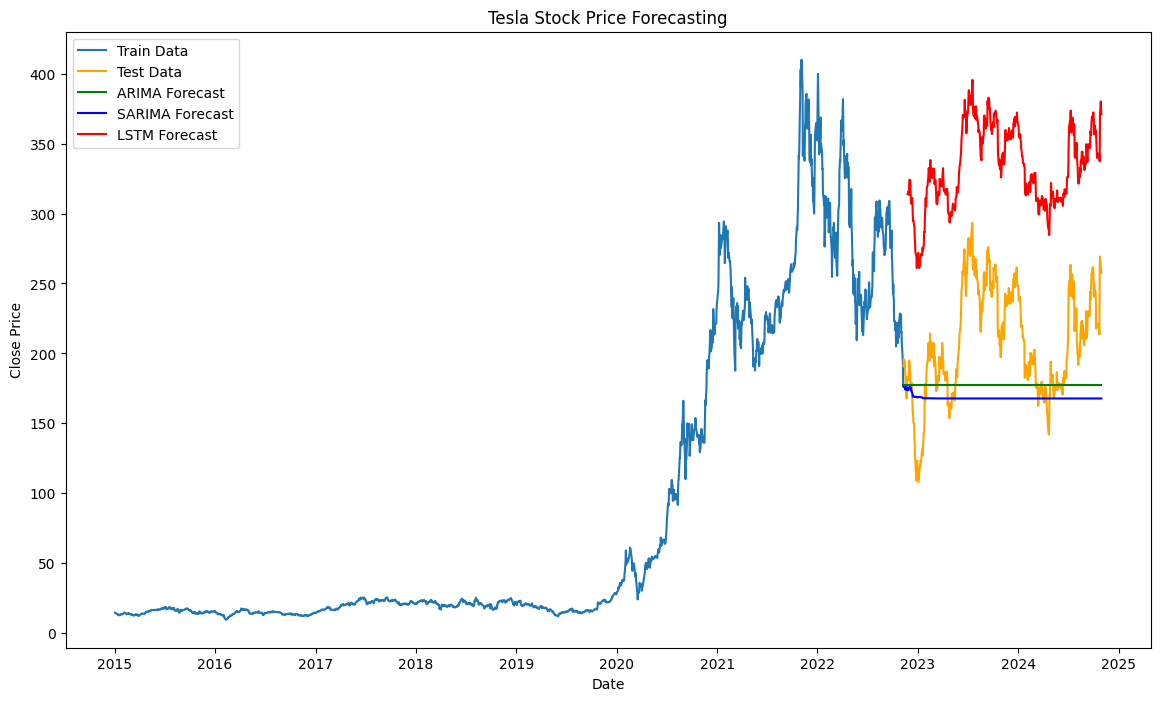

In [85]:
# --- Plot Results ---
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='blue')
plt.plot(test.index[seq_length:], lstm_forecast, label='LSTM Forecast', color='red')
plt.title('Tesla Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

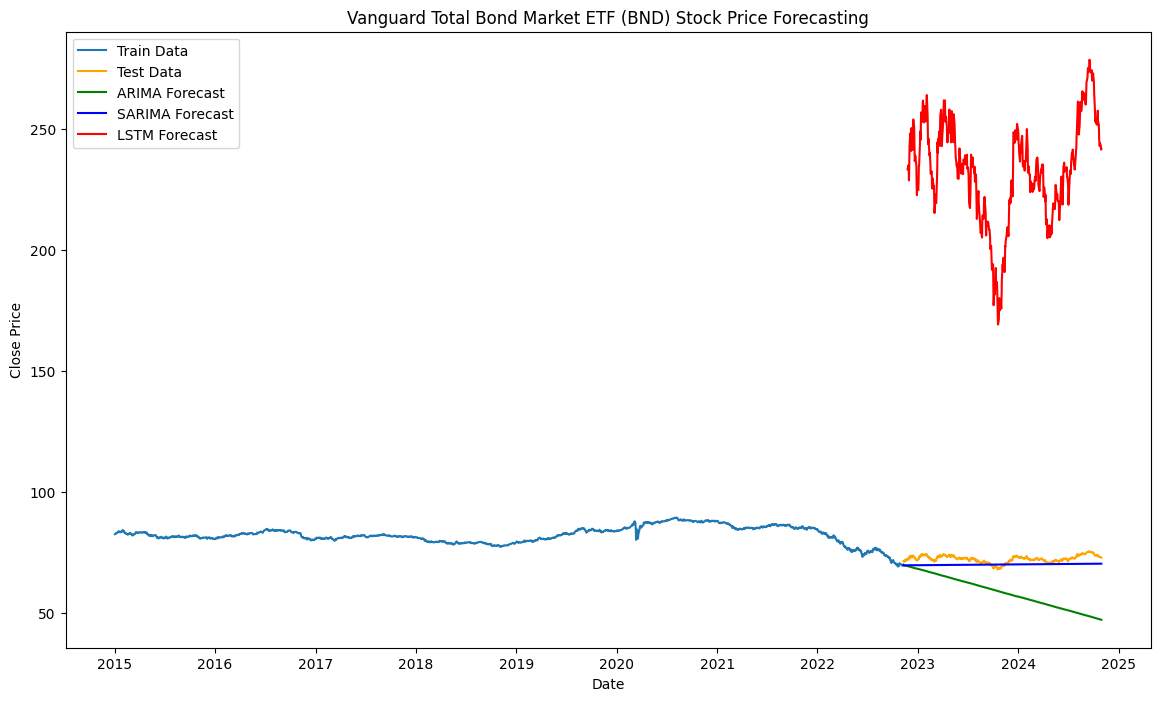

In [86]:
# --- Plot Results ---
plt.figure(figsize=(14, 8))
plt.plot(train1.index, train1['Close'], label='Train Data')
plt.plot(test1.index, test1['Close'], label='Test Data', color='orange')
plt.plot(test1.index, arima_forecast1, label='ARIMA Forecast', color='green')
plt.plot(test1.index, sarima_forecast1, label='SARIMA Forecast', color='blue')
plt.plot(test1.index[seq_length:], lstm_forecast1, label='LSTM Forecast', color='red')
plt.title('Vanguard Total Bond Market ETF (BND) Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

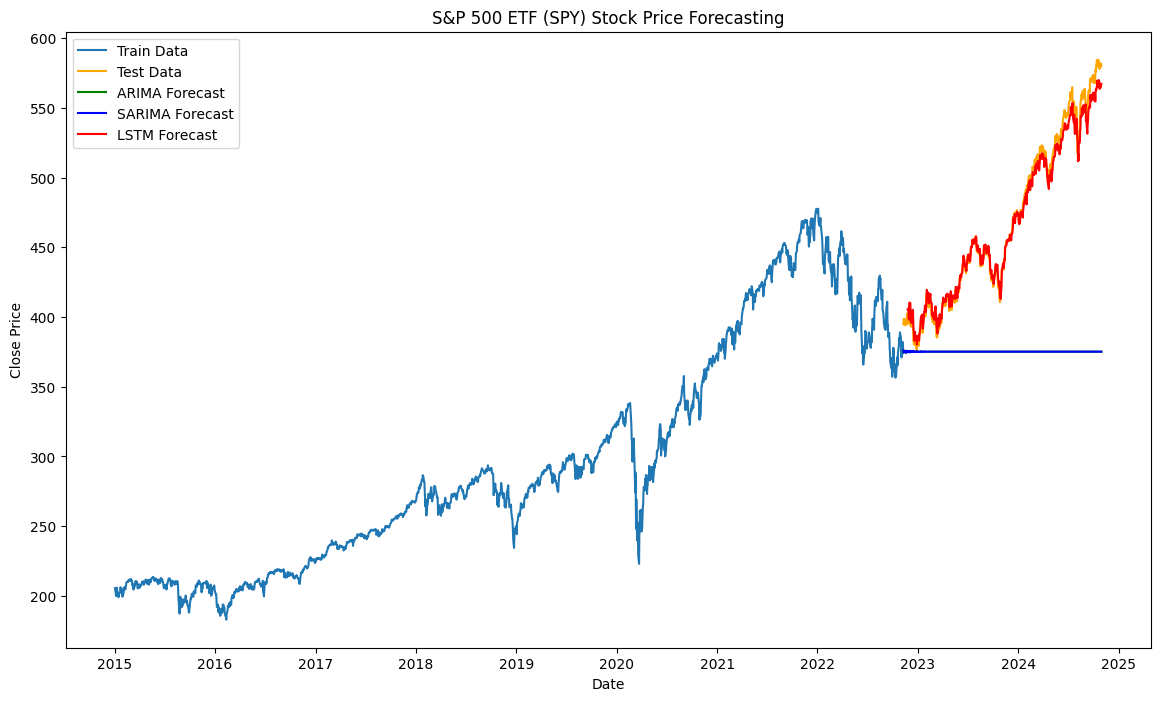

In [87]:
# --- Plot Results ---
plt.figure(figsize=(14, 8))
plt.plot(train2.index, train2['Close'], label='Train Data')
plt.plot(test2.index, test2['Close'], label='Test Data', color='orange')
plt.plot(test2.index, arima_forecast2, label='ARIMA Forecast', color='green')
plt.plot(test2.index, sarima_forecast2, label='SARIMA Forecast', color='blue')
plt.plot(test2.index[seq_length:], lstm_forecast2, label='LSTM Forecast', color='red')
plt.title('S&P 500 ETF (SPY) Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()